In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy

In [ ]:
# 1. Setup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
review_file_names = [
    "1.B0BGGGG4VW - Vantrue E1 Lite 1080P WiFi Mini Dash Cam with GPS  2025-07-18",
    "2.B0B6B6RQT1 - Vantrue E2 Dash Cam Front and Rear, 2.7K Upgrade R 2025-07-18",
    "3.B0DYV5YQ1Y - AZDOME PG17 Max 4K+2.5K Mirror Dash Cam with ADAS, 2025-07-18"
]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Load Data
review_file_name = review_file_names[1]
base_dir = "/content/drive/MyDrive/find_the_niche/"
review_file_name = base_dir + review_file_name + ".csv"
reviews = pd.read_csv(review_file_name)
# reviews.info()
reviews = reviews[['Body', 'Rating']].dropna()
reviews = reviews.rename(columns={'Body': 'reviewText', 'Rating': 'overall'})

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  94 non-null     object 
 1   overall     94 non-null     int64  
 2   sentiment   94 non-null     float64
 3   tokens      94 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
# 3. Sentiment Analysis
reviews['sentiment'] = reviews['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
reviews_sorted = reviews.sort_values(by='sentiment', ascending=True)
reviews_sorted[['reviewText', 'sentiment','overall']]

,reviewText,sentiment,overall
28,"Unable to capture the Name plate , video quali...",-0.300000,2
11,Dashcam stopped working within 2 years. Contac...,-0.268056,1
8,Reconsider choosing this camera and brand. Min...,-0.161111,1
34,Vantrue description says camera mounts are mag...,-0.125000,1
3,So I’ve owned this camera for two years. I not...,-0.118929,1
...,...,...,...
84,WORKS GREAT LOOKS GREAT,0.800000,5
87,Very Good,0.910000,5
79,Works perfect.,1.000000,5
49,We needed a camera system for our tow trucks w...,1.000000,5


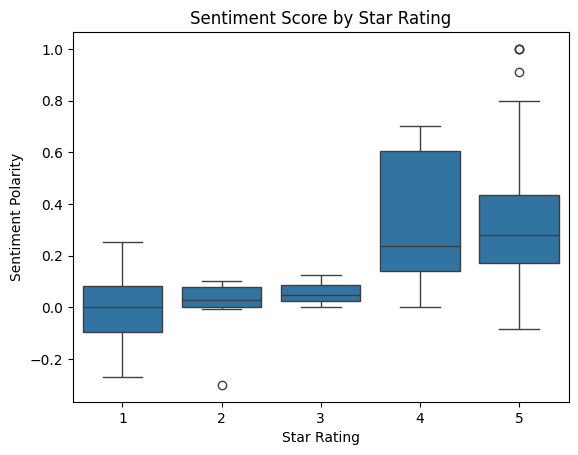

In [ ]:
# 4. Visualization
sns.boxplot(data=reviews, x='overall', y='sentiment')
plt.title('Sentiment Score by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

/tmp/ipython-input-1032568786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='overall', palette='viridis')


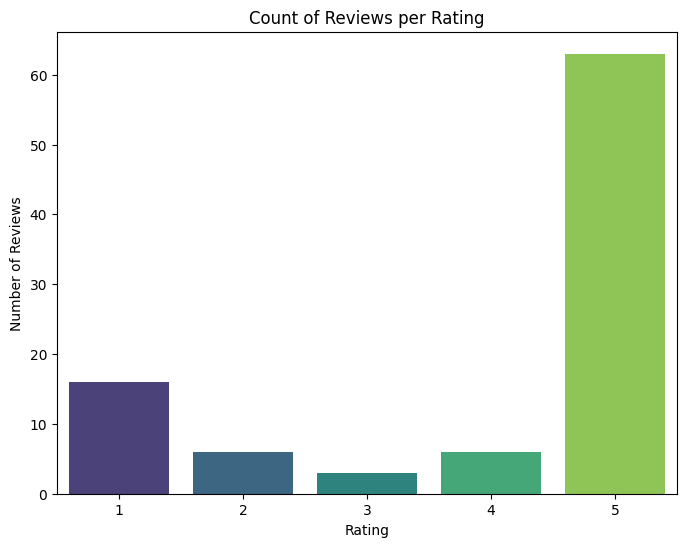

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='overall', palette='viridis')
plt.title('Count of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# 5. Topic Modeling
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]

reviews['tokens'] = reviews['reviewText'].apply(preprocess)

In [ ]:
reviews

,reviewText,overall,tokens
0,08/26/22 update - after some fairly annoying b...,1,"[update, fairly, annoying, back, forth, vantru..."
1,"Update 9/17/2002: After weeks of tests, everyt...",3,"[update, weeks, tests, everything, points, pro..."
2,There’s plenty of dashcam options out there fo...,2,"[plenty, dashcam, options, less, half, price, ..."
3,So I’ve owned this camera for two years. I not...,1,"[owned, camera, two, years, notice, year, half..."
4,Installation and first impression- Everything ...,5,"[installation, first, everything, needed, moun..."
...,...,...,...
89,This is a big step up for my dashcam compared ...,5,"[big, step, dashcam, compared, old, suction, c..."
90,I like the Vantrue N4 and I wish it can be con...,5,"[like, vantrue, wish, connected, phone, want, ..."
91,Let's start with dashcams in general. Dashcams...,5,"[let, start, dashcams, general, dashcams, offe..."
92,"My family has used several in the past, howeve...",5,"[family, used, several, past, however, differe..."


In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.show_topics()

[(0,
  '0.034*"camera" + 0.011*"mount" + 0.008*"power" + 0.008*"recording" + 0.007*"vantrue" + 0.007*"dash" + 0.007*"dashcam" + 0.006*"one" + 0.006*"suction" + 0.005*"much"'),
 (1,
  '0.025*"camera" + 0.010*"vantrue" + 0.010*"rear" + 0.009*"easy" + 0.008*"dash" + 0.007*"video" + 0.007*"cameras" + 0.006*"front" + 0.006*"car" + 0.006*"like"'),
 (2,
  '0.024*"cam" + 0.013*"dash" + 0.010*"camera" + 0.010*"good" + 0.010*"car" + 0.008*"vantrue" + 0.007*"suction" + 0.007*"one" + 0.007*"video" + 0.007*"quality"')]

In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.029*"camera" + 0.009*"cam" + 0.009*"vantrue" + 0.007*"rear" + 0.007*"dash" + 0.007*"car" + 0.007*"mount" + 0.006*"easy" + 0.005*"recording" + 0.005*"one"'),
 (1,
  '0.015*"camera" + 0.012*"dash" + 0.011*"cam" + 0.008*"vantrue" + 0.007*"one" + 0.007*"good" + 0.007*"video" + 0.006*"would" + 0.006*"suction" + 0.006*"mount"')]

# Filter for <=3 ratings

In [ ]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)

/tmp/ipython-input-2551902449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


In [ ]:
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.010*"heat" + 0.010*"vantrue" + 0.010*"camera" + 0.007*"quality" + 0.007*"two" + 0.007*"video" + 0.007*"issue" + 0.007*"reached" + 0.007*"mounts" + 0.007*"support"'),
 (1,
  '0.035*"camera" + 0.012*"warranty" + 0.009*"screen" + 0.009*"worked" + 0.009*"vantrue" + 0.008*"amazon" + 0.008*"years" + 0.006*"old" + 0.006*"app" + 0.006*"much"'),
 (2,
  '0.030*"camera" + 0.012*"recording" + 0.012*"car" + 0.012*"power" + 0.011*"unit" + 0.008*"vantrue" + 0.008*"mode" + 0.008*"hardwire" + 0.007*"collision" + 0.007*"parking"')]

# Adding common phrases

In [ ]:
from gensim.models import Phrases
bigram = Phrases(reviews['tokens'], min_count=2, threshold=5)
bigram_mod = Phrases(bigram[reviews['tokens']])
reviews['tokens'] = [bigram[doc] for doc in reviews['tokens']]

In [ ]:
reviews

,reviewText,overall,tokens
0,08/26/22 update - after some fairly annoying b...,1,"[update, fairly, annoying, back, forth, vantru..."
1,"Update 9/17/2002: After weeks of tests, everyt...",3,"[update, weeks, tests, everything, points, pro..."
2,There’s plenty of dashcam options out there fo...,2,"[plenty, dashcam, options, less, half, price, ..."
3,So I’ve owned this camera for two years. I not...,1,"[owned, camera, two, years, notice, year, half..."
4,Installation and first impression- Everything ...,5,"[installation, first, everything, needed, moun..."
...,...,...,...
89,This is a big step up for my dashcam compared ...,5,"[big, step, dashcam, compared, old, suction_cu..."
90,I like the Vantrue N4 and I wish it can be con...,5,"[like, vantrue, wish, connected, phone, want, ..."
91,Let's start with dashcams in general. Dashcams...,5,"[let, start, dashcams, general, dashcams, offe..."
92,"My family has used several in the past, howeve...",5,"[family, used, several, past, however, differe..."


In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.027*"camera" + 0.011*"vantrue" + 0.008*"one" + 0.007*"dashcam" + 0.006*"dash_cam" + 0.006*"like" + 0.005*"car" + 0.005*"great" + 0.005*"get" + 0.004*"wire"'),
 (1,
  '0.013*"mount" + 0.008*"cam" + 0.008*"came" + 0.006*"would" + 0.005*"also" + 0.005*"perfect" + 0.004*"good" + 0.004*"suction_mount" + 0.004*"windshield" + 0.004*"phone"'),
 (2,
  '0.019*"camera" + 0.010*"vantrue" + 0.010*"dash_cam" + 0.007*"also" + 0.006*"need" + 0.006*"car" + 0.006*"unit" + 0.006*"video" + 0.006*"cameras" + 0.005*"recording"')]

In [ ]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

/tmp/ipython-input-1734944771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


[(0,
  '0.039*"camera" + 0.010*"hardwire" + 0.009*"new" + 0.007*"screen" + 0.007*"vantrue" + 0.007*"day" + 0.007*"one" + 0.007*"kit" + 0.006*"cameras" + 0.006*"car"'),
 (1,
  '0.021*"camera" + 0.008*"brand" + 0.008*"years" + 0.008*"worked" + 0.008*"get" + 0.008*"card" + 0.008*"recording" + 0.006*"quality" + 0.006*"months" + 0.006*"customer"'),
 (2,
  '0.024*"camera" + 0.014*"power" + 0.013*"vantrue" + 0.011*"unit" + 0.010*"car" + 0.010*"recording" + 0.009*"mode" + 0.008*"collision" + 0.008*"purchased" + 0.008*"amazon"')]

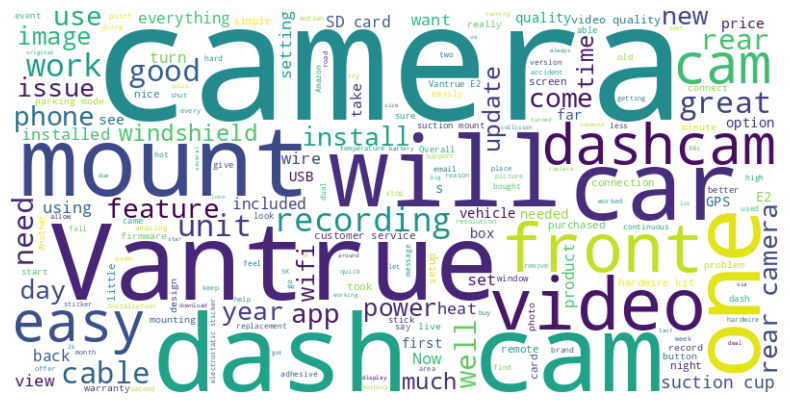

In [ ]:
from wordcloud import WordCloud

text = " ".join(reviews['reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Trying facebook model

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
# candidate_labels = [
#     "scent lasts long",
#     "smells great",
#     "disappointing longevity",
#     "poor packaging",
#     "worth the money",
#     "too expensive",
#     "chemical smell"
# ]

candidate_labels = [
    "bad mount",
    "good video quality",
    "works as expected",
    "bad video quality",
    "corrupt sd card",
    "durability problems",
    "overheating and deformation",
    "stops recording"
]

candidate_labels = [
    bad mount
    good video quality
    works as expected
    bad video quality
    corrupt sd card
    durability problems
    overheating and deformation
    stops recording
]

In [ ]:
# review = "Smells amazing at first but fades in less than a day."
review = "Worked fine for a few months then get the dreaded ‘SD CARD ERROR’ and now it is useless. Bought a new card, tried resetting it, tried all the troubleshooting…. And now have a dash cam that doesn’t record, so what’s the point?"
result = classifier(review, candidate_labels, multi_label=False)

print("Predicted label:", result['labels'][0])
print("Confidence:", result['scores'][0])


Predicted label: stops recording
Confidence: 0.5815975666046143


In [ ]:
reviews['zero_shot_label'] = reviews['reviewText'].apply(
    lambda x: classifier(str(x), candidate_labels, multi_label=False)['labels'][0]
)

In [ ]:
reviews

,reviewText,overall,tokens,zero_shot_label
0,08/26/22 update - after some fairly annoying b...,1,"[update, fairly, annoying, back, forth, vantru...",stops recording
1,"Update 9/17/2002: After weeks of tests, everyt...",3,"[update, weeks, tests, everything, points, pro...",stops recording
2,There’s plenty of dashcam options out there fo...,2,"[plenty, dashcam, options, less, half, price, ...",stops recording
3,So I’ve owned this camera for two years. I not...,1,"[owned, camera, two, years, notice, year, half...",overheating and deformation
4,Installation and first impression- Everything ...,5,"[installation, first, everything, needed, moun...",good video quality
...,...,...,...,...
89,This is a big step up for my dashcam compared ...,5,"[big, step, dashcam, compared, old, suction_cu...",durability problems
90,I like the Vantrue N4 and I wish it can be con...,5,"[like, vantrue, wish, connected, phone, want, ...",good video quality
91,Let's start with dashcams in general. Dashcams...,5,"[let, start, dashcams, general, dashcams, offe...",good video quality
92,"My family has used several in the past, howeve...",5,"[family, used, several, past, however, differe...",good video quality


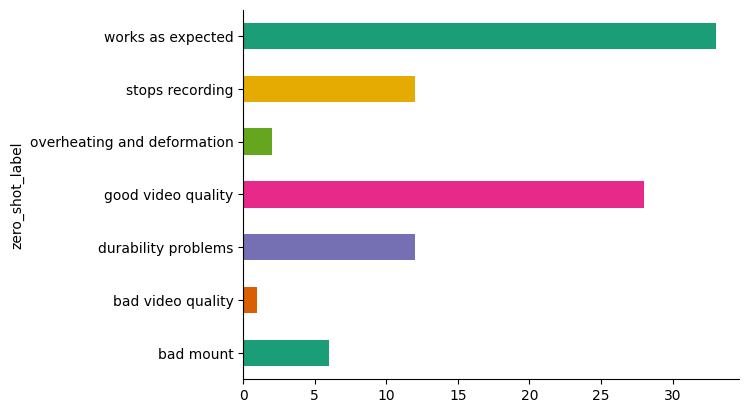

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
reviews.groupby('zero_shot_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
reviews[reviews['zero_shot_label'] == 'stops recording']

,reviewText,overall,tokens,zero_shot_label
0,08/26/22 update - after some fairly annoying b...,1,"[update, fairly, annoying, back, forth, vantru...",stops recording
1,"Update 9/17/2002: After weeks of tests, everyt...",3,"[update, weeks, tests, everything, points, pro...",stops recording
2,There’s plenty of dashcam options out there fo...,2,"[plenty, dashcam, options, less, half, price, ...",stops recording
5,This was the second vantrue front/rear camera ...,1,"[second, vantrue, camera_system, installed, fi...",stops recording
11,Dashcam stopped working within 2 years. Contac...,1,"[dashcam, stopped, working, within, years, con...",stops recording
12,The camera will stop recording during mid driv...,1,"[camera, stop_recording, mid, drive, reason, f...",stops recording
13,Camera will NEVER work properly. Always random...,1,"[camera, never, work, properly, always, random...",stops recording
16,Avoid this camera at all costs if you live in ...,1,"[avoid, camera, costs, live, heat, south, over...",stops recording
17,Worked fine for a few months then get the drea...,1,"[worked_fine, months, get, dreaded, card, erro...",stops recording
26,The rear camera doesn't workLoop feature only ...,1,"[rear_camera, workloop, feature, captures, eve...",stops recording
